# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot,plot
from plotly.subplots import make_subplots

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv).

### Step 3. Assign it to a variable called tips

In [10]:
tips = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv")
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips.sample(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
12,12,15.42,1.57,Male,No,Sun,Dinner,2
33,33,20.69,2.45,Female,No,Sat,Dinner,4
51,51,10.29,2.60,Female,No,Sun,Dinner,2
198,198,13.00,2.00,Female,Yes,Thur,Lunch,2
135,135,8.51,1.25,Female,No,Thur,Lunch,2


### Step 4. Delete the Unnamed 0 column

In [12]:
tips = tips.drop('Unnamed: 0',axis=1)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
93,16.32,4.30,Female,Yes,Fri,Dinner,2
171,15.81,3.16,Male,Yes,Sat,Dinner,2
35,24.06,3.60,Male,No,Sat,Dinner,3
44,30.40,5.60,Male,No,Sun,Dinner,4
174,16.82,4.00,Male,Yes,Sun,Dinner,2


### Step 5. Plot the total_bill column histogram

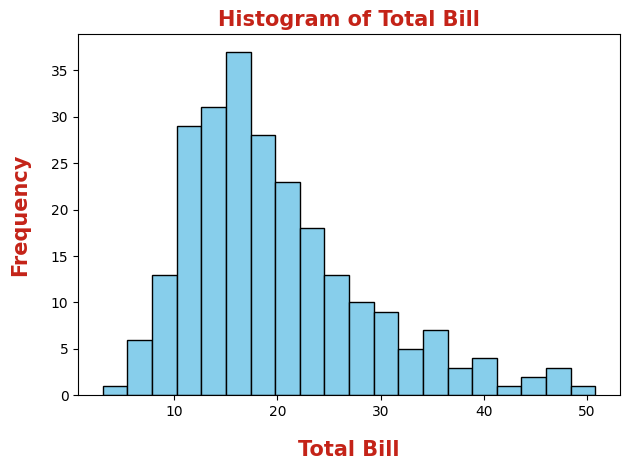

In [29]:
plt.Figure(figsize=(8,6))
plt.hist(tips['total_bill'],bins=20,color='skyblue',edgecolor='black')
plt.xlabel('Total Bill',weight='bold',fontsize=15,labelpad=15,color='#c42318')
plt.ylabel('Frequency',weight='bold',fontsize=15,labelpad=15,color='#c42318')
plt.title('Histogram of Total Bill',weight='bold',fontsize=15,color='#c42318')
plt.tight_layout()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

In [44]:
tip_scatter = tips[['total_bill','tip']].value_counts()
tip_scatter = pd.DataFrame(tip_scatter).reset_index()
tip_scatter = tip_scatter.iloc[:,:-1]

iplot(px.scatter(tip_scatter,
                 x='total_bill',
                 y='tip',
                 title='Relationship between Total Bill and Tip',
                 color='total_bill',
))

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

In [45]:
iplot(px.scatter_3d(tips, x='total_bill', y='tip', z='size',
                             title='Relationship between Total Bill, Tip, and Size'))

### Step 8. Present the relationship between days and total_bill value

In [65]:
days_total_bill = tips[['day','total_bill']].groupby('day').value_counts()
days_total_bill = pd.DataFrame(days_total_bill).reset_index().iloc[:,:-1]
iplot(px.bar(days_total_bill,
             x='day',
             y='total_bill',
             labels={'day':'Day','total_bill':'Total Bill'},
             color='day'
).update_xaxes(type='category'))

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

In [78]:
scatter_day_tip_sex = tips[['day','tip','sex']].groupby(['day','sex']).value_counts().reset_index()
scatter_day_tip_sex = pd.DataFrame(scatter_day_tip_sex).iloc[:,:-1]

iplot(px.scatter(scatter_day_tip_sex,
                 x='tip',
                 y='day',
                 color='sex',
                 title='Tip vs Day, Differentiated by Sex',

).update_layout(xaxis_title='Tip', yaxis_title='Day'))

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

In [81]:
iplot(px.box(tips, x='day', y='total_bill', color='time',
                        title='Total Bill per Day, Differentiated by Time').update_layout(xaxis_title='Day',yaxis_title='Total Bill'))

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

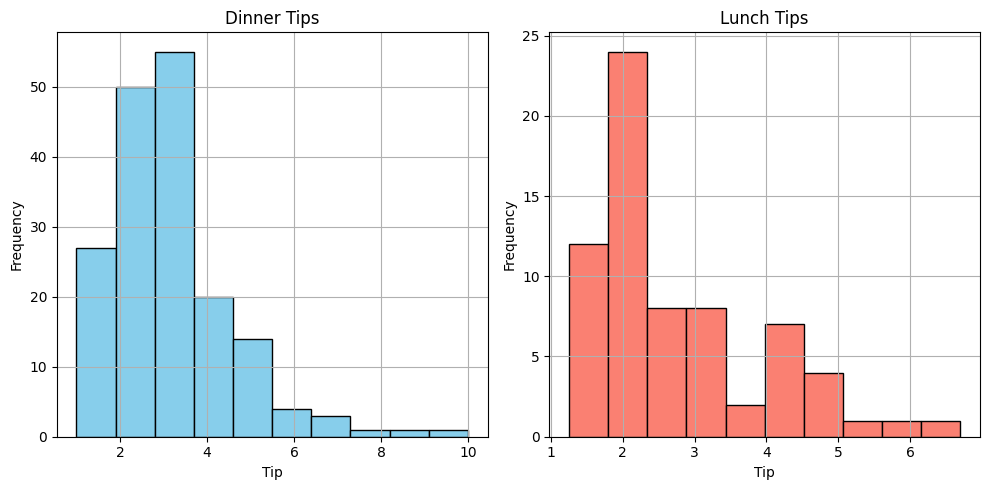

In [86]:
tips_dinner = tips[tips['time'] == 'Dinner']
tips_lunch = tips[tips['time'] == 'Lunch']
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(tips_dinner['tip'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Dinner Tips')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(tips_lunch['tip'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Lunch Tips')
plt.grid(True)

plt.tight_layout()
plt.show()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

In [94]:
male_date = tips[tips['sex']=='Male']
female_date = tips[tips['sex']=='Female']

male_scatter = px.scatter(male_date,
                          x='total_bill',
                          y='tip',
                          color='smoker',
                          title='Male: Total Bill vs Tip by Smoker Status',
                          facet_col='smoker',
                          labels={'total_bill': 'Total Bill', 'tip': 'Tip'}
)
male_scatter.show()
female_scatter = px.scatter(female_date,
                          x='total_bill',
                          y='tip',
                          color='smoker',
                          title='Female: Total Bill vs Tip by Smoker Status',
                          facet_col='smoker',
                          labels={'total_bill': 'Total Bill', 'tip': 'Tip'}
)
female_scatter.show()

# Number of smokers Female or Male

In [124]:
smokers_sex_df = tips.groupby(['sex', 'smoker']).size().reset_index(name='count')

male_smokers_count = smokers_sex_df[(smokers_sex_df['sex'] == 'Male') & (smokers_sex_df['smoker'] == 'Yes')]['count'].values[0]


female_smokers_count = smokers_sex_df[(smokers_sex_df['sex'] == 'Female') & (smokers_sex_df['smoker'] == 'Yes')]['count'].values[0]

labels = ['Male Smokers', 'Female Smokers']
values = [male_smokers_count, female_smokers_count]

pie_chart = px.pie(values=values, names=labels, title='Number of Male and Female Smokers')
pie_chart.show()